# MLP using Keras & Scikit-Optimize: Thyroid Datasets

In [1]:
import tensorflow.keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
## Importing required libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions)
  names = np.unique(labels)
  #print() 
  df_cm = pd.DataFrame(cm, names,names)
  print(cm)
  plt.figure(figsize=(8,8))
  sns.heatmap(df_cm, annot=True, fmt="d")
  plt.title('Confusion Matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

import pandas as pd
X_train = pd.read_csv('ann-train.data', header=None, sep=" ") 
Y_train=X_train[21]
X_train.drop([21,22,23],axis=1, inplace=True)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0.00060,0.015,0.120,0.082,0.146
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00025,0.030,0.143,0.133,0.108
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00190,0.024,0.102,0.131,0.078
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00090,0.017,0.077,0.090,0.085
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00025,0.026,0.139,0.090,0.153


In [2]:
print("Classes -> number of representatives:")
print(Y_train.value_counts())
times_class1 = Y_train.value_counts()[3]//Y_train.value_counts()[1]
times_class2 = Y_train.value_counts()[3]//Y_train.value_counts()[2]
print("Times more needed for class 1 -> ", times_class1)
print("Times more needed for class 2 -> ", times_class2)

Classes -> number of representatives:
3    3488
2     191
1      93
Name: 21, dtype: int64
Times more needed for class 1 ->  37
Times more needed for class 2 ->  18


In [3]:
from sklearn.utils import resample
# Resampling Techniques — Oversample minority class
    # separate minority and majority classes
    # Create more records for underrepresented classes
class1indexes = Y_train.loc[Y_train == 1]
class2indexes = Y_train.loc[Y_train == 2]
class3indexes = Y_train.loc[Y_train == 3]

#class2indexes.head()

class1 = X_train.loc[class1indexes.index]
class2 = X_train.loc[class2indexes.index]
class3 = X_train.loc[class3indexes.index]
# upsample minority
one_upsampled = resample(class1,
                          replace=True, # sample with replacement
                          n_samples=len(class3), # match number in majority class
                          random_state=27) # reproducible results
one_upsampled[21] = pd.Series(1, index=one_upsampled.index) 
print(one_upsampled.shape)
two_upsampled = resample(class2,
                          replace=True, # sample with replacement
                          n_samples=len(class3), # match number in majority class
                          random_state=27) # reproducible results
two_upsampled[21] = pd.Series(2, index=two_upsampled.index)
print(two_upsampled.shape)
two_upsampled.head()

(3488, 22)
(3488, 22)


/Users/iostaptchenko/projects/secret/wsu/ie7860/ds/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/iostaptchenko/projects/secret/wsu/ie7860/ds/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
695,0.76,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0110,0.0120,0.086,0.085,0.101,2
3667,0.18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0120,0.0174,0.142,0.137,0.104,2
1708,0.42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0130,0.0190,0.061,0.082,0.074,2
908,0.80,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0061,0.0130,0.083,0.088,0.095,2
1462,0.76,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0075,0.0208,0.089,0.114,0.078,2


Text(0.5, 1.0, 'Density Plot for continues features in Training Dataset - Before Scaling')

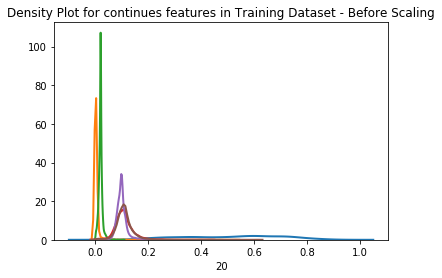

In [4]:
# Iterate through the features
for i in [0,16,17,18,19,20]:
    # Draw the density plot
    sns.distplot(X_train[i], hist = False, kde = True,
                 kde_kws = {'linewidth': 2})
    
plt.title('Density Plot for continues features in Training Dataset - Before Scaling')

In [5]:
print("Training data shape: ",X_train.shape)
X_train[21] = Y_train
print("Training data shape with yZ: ",X_train.shape)
X_train = X_train.append(one_upsampled,ignore_index=True).append(two_upsampled,ignore_index=True).sample(frac=1)
#train.reset_index(inplace=True, drop=True)
print("New Training data shape: ",X_train.shape)
X_train.head()

Training data shape:  (3772, 21)
Training data shape with yZ:  (3772, 22)
New Training data shape:  (10748, 22)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
10145,0.19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0090,0.0174,0.095,0.087,0.110,2
3937,0.44,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0410,0.0150,0.048,0.116,0.041,1
7873,0.65,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0.0120,0.0174,0.099,0.114,0.087,2
7735,0.40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0092,0.0150,0.113,0.103,0.109,2
5255,0.71,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0.0250,0.0030,0.031,0.068,0.046,1


In [6]:
# keep the class labels of training dataframe
Y_train=X_train[21]
print("yZ of training data shape: ",Y_train.shape)
# remove lables from training dataframe
X_train.drop([21],axis=1, inplace=True)
print("training data shape: ",X_train.shape)
print("Classes -> number of representatives:")
print(Y_train.value_counts())
print(X_train.shape)

yZ of training data shape:  (10748,)
training data shape:  (10748, 21)
Classes -> number of representatives:
2    3679
1    3581
3    3488
Name: 21, dtype: int64
(10748, 21)


Plot some sample images along with their labels.

(10748, 21)


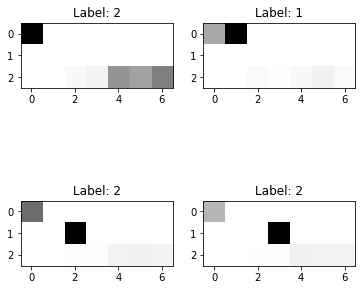

In [7]:
print(X_train.shape)
plt.figure(figsize=[6,6])
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title("Label: %i"%Y_train.iloc[i])
    plt.imshow(X_train.iloc[i].values.reshape(3,7),cmap='Greys');

In [8]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_train.head()


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
10145,-1.714500,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.353374,0.182772,0.384960,-0.762326,0.740196
3937,-0.394968,1.721798,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,0.075929,-0.118012,-0.738668,0.814137,-0.926088
7873,0.713439,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,2.891776,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.313127,0.182772,0.480588,0.705416,0.184768
7735,-0.606093,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.350691,-0.118012,0.815285,0.107447,0.716047
5255,1.030126,1.721798,3.531101,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,2.891776,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.138723,-1.621933,-1.145086,-1.795181,-0.805343


Classes -> number of representatives:
3    3178
2     177
1      73
Name: 21, dtype: int64
test data shape:  (3428, 21)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.186687,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.392280,1.511235,0.767471,1.629549,0.136470
1,-1.028344,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.456675,0.383295,0.121983,-1.251573,0.667749
2,-0.870000,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.474116,1.887215,3.827563,-0.055635,3.855424
3,-1.608938,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.460700,0.257968,0.193704,-0.707965,0.474557
4,-1.556156,-0.580788,-0.283198,-0.099326,-0.072371,5.507747,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.468749,0.759275,1.317331,1.846993,0.474557


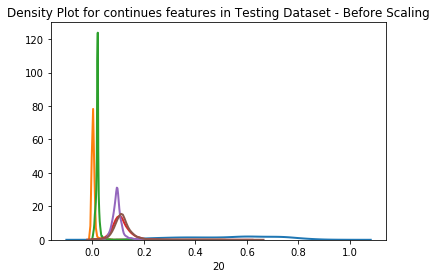

In [9]:
X_test = pd.read_csv('ann-test.data', header=None, sep=" ") 
Y_test=X_test[21]
X_test.drop([21,22,23],axis=1, inplace=True)

print("Classes -> number of representatives:")
print(Y_test.value_counts())
# Iterate through the features
for i in [0,16,17,18,19,20]:
    # Draw the density plot
    sns.distplot(X_test[i], hist = False, kde = True,
                 kde_kws = {'linewidth': 2})
    
plt.title('Density Plot for continues features in Testing Dataset - Before Scaling')
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
print("test data shape: ",X_test.shape)
X_test.head()

Text(0.5, 1.0, 'Density Plot for continues Scaled features in Training Dataset')

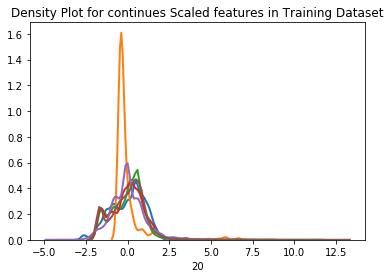

In [10]:
# Iterate through the features
for i in [0,16,17,18,19,20]:
    # Draw the density plot
    sns.distplot(X_train[i], hist = False, kde = True,
                 kde_kws = {'linewidth': 2})
    
plt.title('Density Plot for continues Scaled features in Training Dataset')

Text(0.5, 1.0, 'Density Plot for continues Scaled features in Test Dataset')

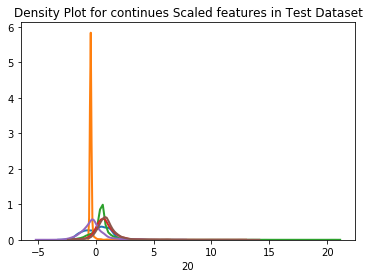

In [11]:
# Iterate through the features
for i in [0,16,17,18,19,20]:
    # Draw the density plot
    sns.distplot(X_test[i], hist = False, kde = True,
                 kde_kws = {'linewidth': 2})
    
plt.title('Density Plot for continues Scaled features in Test Dataset')

In [12]:
## Changing labels to one-hot encoded vector
lb = LabelBinarizer()
y_train_one_hot = lb.fit_transform(Y_train)
y_test_one_hot = lb.transform(Y_test)
print('Train labels dimension:');print(y_train_one_hot.shape)
print('Test labels dimension:');print(y_test_one_hot.shape)

Train labels dimension:
(10748, 3)
Test labels dimension:
(3428, 3)


Now we have processed the data, let's start building our multi-layer perceptron using tensorflow. We will begin by importing the required libraries.

In [13]:
## Importing required libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Define & Compile Keras Model for Hyper-Parameter Optimization

In [14]:
# Defining various initialization parameters for MLP model
num_features = X_train.shape[1]; num_classes = y_train_one_hot.shape[1] 

# Let's create a helper function first which builds the model with various parameters.
def get_model(dense_0_neurons, dense_1_neurons, dense_2_neurons, dropout_rate, input_dim, num_classes):
    # Builds a Sequential MLP model using Keras and returns it
    # Define the keras model
    model = Sequential()
    model.add(Dense(dense_0_neurons, input_dim=input_dim, activation='relu', name="dense_1"))
    model.add(Dropout(dropout_rate, name="dropout"))
    model.add(Dense(dense_1_neurons, activation='relu', name="dense_2"))
    model.add(Dense(dense_2_neurons, activation='sigmoid', name="dense_3"))
    model.add(Dense(num_classes, activation='sigmoid', name="dense_4"))
    return model

### Setup Keras Model for Scikit-Optimizer

In [15]:
import skopt
from skopt import gp_minimize

# Specify `Static' Parameters
STATIC_PARAMS = {num_features, num_classes}

# Bounded region of parameter space
# The list of hyper-parameters we want to optimize. For each one we define the
# bounds, the corresponding scikit-learn parameter name, as well as how to
# sample values from that dimension (`'log-uniform'` for the dropout_rate)
SPACE = [skopt.space.Integer(8, 512, name='dense_0_neurons'),
         skopt.space.Integer(8, 512, name='dense_1_neurons'),
         skopt.space.Integer(8, 512, name='dense_2_neurons'),
         skopt.space.Real(0.0, 0.8, name='dropout_rate')]

# This decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set
# scikit-learn estimator parameters         
@skopt.utils.use_named_args(SPACE)
         
# Define objective for optimization
def objective(**params):
  
    # All parameters: 
    #all_params = {**params, **STATIC_PARAMS}
    
    # Create the model using a specified hyperparameters.
    #model = get_model(all_params)
    model = get_model(params["dense_0_neurons"], params["dense_1_neurons"], params["dense_2_neurons"], params["dropout_rate"], num_features, num_classes)

    # Compile the keras model for a specified number of epochs.
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['categorical_accuracy'])

    # Fit keras model
    history = model.fit(X_train, y_train_one_hot, epochs=8, batch_size=64, 
                        validation_split = 0.20, verbose=1)

    # Evaluate the model with the eval dataset.
    score = model.evaluate(X_test, y_test_one_hot,
                                  batch_size=64, verbose=1)
    print('Test loss:', score[0], '   Test accuracy:', score[1])

    # Return the accuracy.
    return -1.0 * score[1]

print(STATIC_PARAMS)

{3, 21}


### Run Scikit-Optimizer
There are several methods for optimization: https://scikit-optimize.github.io/modules/minimize_functions.html#minimize-functions

In [17]:
import warnings
warnings.filterwarnings('ignore')

results_gp = skopt.gbrt_minimize(objective,     # the function to minimize
                          SPACE,              # the bounds on each dimension of x
                          x0=[32,16,32,0],      # the starting point
                          acq_func="LCB",     # the acquisition function (optional)
                          n_calls=50,         # the number of evaluations of f including at x0
                          n_random_starts=4,  # the number of random initialization points
                          random_state=0)

Train on 8598 samples, validate on 2150 samples
Epoch 1/8
8598/8598 [==============================] - 1s 85us/sample - loss: 0.8174 - categorical_accuracy: 0.6628 - val_loss: 0.5719 - val_categorical_accuracy: 0.7651
Epoch 2/8
8598/8598 [==============================] - 0s 30us/sample - loss: 0.4845 - categorical_accuracy: 0.7897 - val_loss: 0.4411 - val_categorical_accuracy: 0.7944
Epoch 3/8
8598/8598 [==============================] - 0s 30us/sample - loss: 0.4020 - categorical_accuracy: 0.8126 - val_loss: 0.3876 - val_categorical_accuracy: 0.8274
Epoch 4/8
8598/8598 [==============================] - 0s 26us/sample - loss: 0.3604 - categorical_accuracy: 0.8352 - val_loss: 0.3550 - val_categorical_accuracy: 0.8414
Epoch 5/8
8598/8598 [==============================] - 0s 32us/sample - loss: 0.3298 - categorical_accuracy: 0.8554 - val_loss: 0.3305 - val_categorical_accuracy: 0.8358
Epoch 6/8
8598/8598 [==============================] - 0s 30us/sample - loss: 0.3068 - categorical_acc

Epoch 4/8
8598/8598 [==============================] - 1s 64us/sample - loss: 0.2890 - categorical_accuracy: 0.8701 - val_loss: 0.2812 - val_categorical_accuracy: 0.8619
Epoch 5/8
8598/8598 [==============================] - 1s 59us/sample - loss: 0.2528 - categorical_accuracy: 0.8867 - val_loss: 0.1936 - val_categorical_accuracy: 0.9242
Epoch 6/8
8598/8598 [==============================] - 1s 61us/sample - loss: 0.2234 - categorical_accuracy: 0.9033 - val_loss: 0.1566 - val_categorical_accuracy: 0.9428
Epoch 7/8
8598/8598 [==============================] - 1s 60us/sample - loss: 0.1907 - categorical_accuracy: 0.9185 - val_loss: 0.1427 - val_categorical_accuracy: 0.9460
Epoch 8/8
3428/3428 [==============================] - 0s 25us/sample - loss: 0.2480 - categorical_accuracy: 0.9239
Test loss: 0.24803995920938537    Test accuracy: 0.92386234
Train on 8598 samples, validate on 2150 samples
Epoch 1/8
8598/8598 [==============================] - 1s 130us/sample - loss: 0.4532 - categori

Epoch 6/8
8598/8598 [==============================] - 0s 56us/sample - loss: 0.2987 - categorical_accuracy: 0.8621 - val_loss: 0.2868 - val_categorical_accuracy: 0.8702
Epoch 7/8
8598/8598 [==============================] - 0s 51us/sample - loss: 0.2875 - categorical_accuracy: 0.8674 - val_loss: 0.2501 - val_categorical_accuracy: 0.8819
Epoch 8/8
3428/3428 [==============================] - 0s 18us/sample - loss: 0.4689 - categorical_accuracy: 0.7926
Test loss: 0.46892531409146765    Test accuracy: 0.79259044
Train on 8598 samples, validate on 2150 samples
Epoch 1/8
8598/8598 [==============================] - 1s 136us/sample - loss: 0.4746 - categorical_accuracy: 0.7677 - val_loss: 0.4095 - val_categorical_accuracy: 0.7814
Epoch 2/8
8598/8598 [==============================] - 0s 53us/sample - loss: 0.3586 - categorical_accuracy: 0.8268 - val_loss: 0.3462 - val_categorical_accuracy: 0.8498
Epoch 3/8
8598/8598 [==============================] - 0s 49us/sample - loss: 0.3249 - categori

Epoch 8/8
3428/3428 [==============================] - 0s 14us/sample - loss: 0.1984 - categorical_accuracy: 0.9417
Test loss: 0.198437351485673    Test accuracy: 0.94165695
Train on 8598 samples, validate on 2150 samples
Epoch 1/8
8598/8598 [==============================] - 1s 106us/sample - loss: 0.4605 - categorical_accuracy: 0.7810 - val_loss: 0.3807 - val_categorical_accuracy: 0.7967
Epoch 2/8
8598/8598 [==============================] - 0s 48us/sample - loss: 0.3528 - categorical_accuracy: 0.8314 - val_loss: 0.3160 - val_categorical_accuracy: 0.8577
Epoch 3/8
8598/8598 [==============================] - 0s 48us/sample - loss: 0.3118 - categorical_accuracy: 0.8596 - val_loss: 0.2899 - val_categorical_accuracy: 0.8744
Epoch 4/8
8598/8598 [==============================] - 0s 44us/sample - loss: 0.2753 - categorical_accuracy: 0.8806 - val_loss: 0.2568 - val_categorical_accuracy: 0.8902
Epoch 5/8
8598/8598 [==============================] - 0s 45us/sample - loss: 0.2374 - categorica

Train on 8598 samples, validate on 2150 samples
Epoch 1/8
8598/8598 [==============================] - 1s 112us/sample - loss: 0.4498 - categorical_accuracy: 0.7809 - val_loss: 0.3484 - val_categorical_accuracy: 0.8279
Epoch 2/8
8598/8598 [==============================] - 1s 61us/sample - loss: 0.3363 - categorical_accuracy: 0.8436 - val_loss: 0.2958 - val_categorical_accuracy: 0.8651
Epoch 3/8
8598/8598 [==============================] - 0s 58us/sample - loss: 0.2909 - categorical_accuracy: 0.8671 - val_loss: 0.2445 - val_categorical_accuracy: 0.8898
Epoch 4/8
8598/8598 [==============================] - 1s 63us/sample - loss: 0.2514 - categorical_accuracy: 0.8908 - val_loss: 0.1823 - val_categorical_accuracy: 0.9223
Epoch 5/8
8598/8598 [==============================] - 1s 62us/sample - loss: 0.2153 - categorical_accuracy: 0.9080 - val_loss: 0.1447 - val_categorical_accuracy: 0.9581
Epoch 6/8
8598/8598 [==============================] - 0s 54us/sample - loss: 0.1856 - categorical_ac

Epoch 4/8
8598/8598 [==============================] - 1s 65us/sample - loss: 0.4559 - categorical_accuracy: 0.7794 - val_loss: 0.4792 - val_categorical_accuracy: 0.7447
Epoch 5/8
8598/8598 [==============================] - 0s 57us/sample - loss: 0.4409 - categorical_accuracy: 0.7894 - val_loss: 0.4219 - val_categorical_accuracy: 0.7874
Epoch 6/8
8598/8598 [==============================] - 0s 55us/sample - loss: 0.4218 - categorical_accuracy: 0.8009 - val_loss: 0.3832 - val_categorical_accuracy: 0.8149
Epoch 7/8
8598/8598 [==============================] - 0s 50us/sample - loss: 0.4078 - categorical_accuracy: 0.8059 - val_loss: 0.4057 - val_categorical_accuracy: 0.7893
Epoch 8/8
3428/3428 [==============================] - 0s 17us/sample - loss: 0.8440 - categorical_accuracy: 0.5064
Test loss: 0.8440173613287882    Test accuracy: 0.50641775
Train on 8598 samples, validate on 2150 samples
Epoch 1/8
8598/8598 [==============================] - 1s 116us/sample - loss: 0.7917 - categoric

Epoch 7/8
8598/8598 [==============================] - 1s 60us/sample - loss: 0.3240 - categorical_accuracy: 0.8518 - val_loss: 0.2923 - val_categorical_accuracy: 0.8744
Epoch 8/8
3428/3428 [==============================] - 0s 21us/sample - loss: 0.6097 - categorical_accuracy: 0.6744
Test loss: 0.6096519801761333    Test accuracy: 0.67444575
Train on 8598 samples, validate on 2150 samples
Epoch 1/8
8598/8598 [==============================] - 1s 113us/sample - loss: 0.6905 - categorical_accuracy: 0.6641 - val_loss: 0.4684 - val_categorical_accuracy: 0.7623
Epoch 2/8
8598/8598 [==============================] - 0s 48us/sample - loss: 0.5430 - categorical_accuracy: 0.7381 - val_loss: 0.4380 - val_categorical_accuracy: 0.7847
Epoch 3/8
8598/8598 [==============================] - 0s 48us/sample - loss: 0.5063 - categorical_accuracy: 0.7497 - val_loss: 0.4755 - val_categorical_accuracy: 0.7479
Epoch 4/8
8598/8598 [==============================] - 0s 44us/sample - loss: 0.4715 - categoric

#### Get Best Parameter Set

In [18]:
print("Best score=%.4f" % results_gp.fun)

print("""Best parameters:
- dense_0_neurons=%d
- dense_1_neurons=%d
- dense_2_neurons=%d
- dropout_rate=%.6f""" % 
      (results_gp.x[0], 
       results_gp.x[1],
       results_gp.x[2], 
       results_gp.x[3]))
print(results_gp.x)

Best score=-0.9489
Best parameters:
- dense_0_neurons=251
- dense_1_neurons=330
- dense_2_neurons=371
- dropout_rate=0.342097
[251, 330, 371, 0.3420969503953366]


#### Convergence Plot

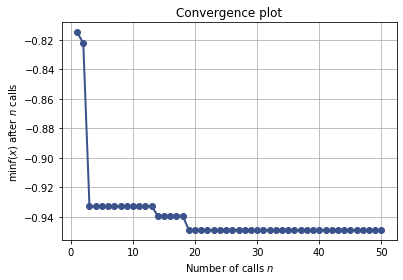

In [19]:
from skopt.plots import plot_convergence
plot_convergence(results_gp)

#### Evaluations Plot
plots.plot_evaluations creates a grid of size n_dims by n_dims. The diagonal shows histograms for each of the dimensions. In the lower triangle (just one plot in this case) a two dimensional scatter plot of all points is shown. The order in which points were evaluated is encoded in the color of each point. Darker/purple colors correspond to earlier samples and lighter/yellow colors correspond to later samples. A red point shows the location of the minimum found by the optimization process.

You should be able to see that points start clustering around the location of the true miminum. The histograms show that the objective is evaluated more often at locations near to one of the three minima.

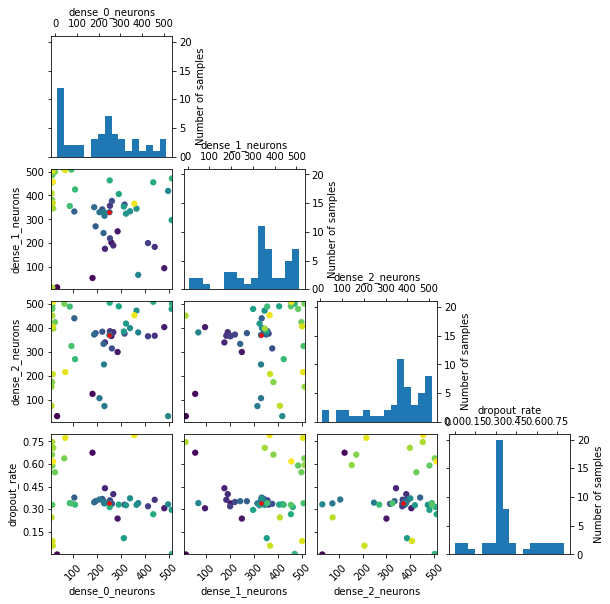

In [20]:
from skopt.plots import plot_evaluations
_ = plot_evaluations(results_gp, bins=16)

#### Objective Partial Dependence Plots
Partial dependence plots were proposed by [Friedman (2001)] as a method for interpreting the importance of input features used in gradient boosting machines. The idea is to visualize how the value of $i$-th variable $x_i$ influences the function $f$ after averaging out the influence of all other variables.For more details see: https://christophm.github.io/interpretable-ml-book/pdp.html

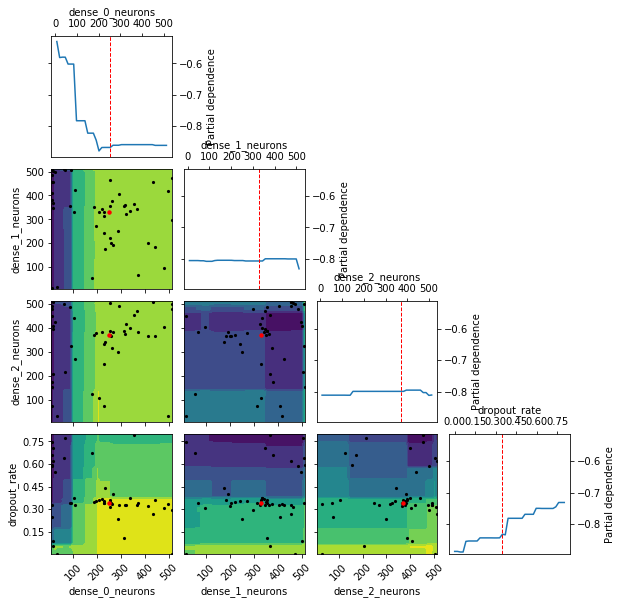

In [21]:
from skopt.plots import plot_objective
_ = plot_objective(results_gp)

### Learn Further using Best Hyper-parameter Settings

In [28]:
# Create the model using a specified hyperparameters.

# Get best hyper-parameters
dense_0_neurons=results_gp.x[0]
dense_1_neurons=results_gp.x[1]
dense_2_neurons=results_gp.x[2]
dropout_rate=results_gp.x[3]

# Build 
model = get_model(dense_0_neurons, dense_1_neurons, dense_2_neurons,dropout_rate, num_features, num_classes)

# Compile the keras model for a specified number of epochs.
model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['categorical_accuracy'])

# Fit keras model
history = model.fit(X_train, y_train_one_hot, epochs=512, batch_size=64, 
                        validation_split = 0.20, verbose=1)

# Evaluate the model with the eval dataset.
score = model.evaluate(X_test, y_test_one_hot,
                                  batch_size=64, verbose=1)
print('Test loss:', score[0], '   Test accuracy:', score[1])

Train on 8598 samples, validate on 2150 samples
Epoch 1/512
8598/8598 [==============================] - 1s 133us/sample - loss: 0.4643 - categorical_accuracy: 0.7738 - val_loss: 0.3641 - val_categorical_accuracy: 0.8135
Epoch 2/512
8598/8598 [==============================] - 1s 66us/sample - loss: 0.3554 - categorical_accuracy: 0.8300 - val_loss: 0.3052 - val_categorical_accuracy: 0.8609
Epoch 3/512
8598/8598 [==============================] - 1s 63us/sample - loss: 0.3085 - categorical_accuracy: 0.8572 - val_loss: 0.2557 - val_categorical_accuracy: 0.8884
Epoch 4/512
8598/8598 [==============================] - 1s 62us/sample - loss: 0.2771 - categorical_accuracy: 0.8779 - val_loss: 0.2422 - val_categorical_accuracy: 0.8995
Epoch 5/512
8598/8598 [==============================] - 1s 63us/sample - loss: 0.2441 - categorical_accuracy: 0.8935 - val_loss: 0.2121 - val_categorical_accuracy: 0.9023
Epoch 6/512
8598/8598 [==============================] - 1s 63us/sample - loss: 0.2045 - ca

8598/8598 [==============================] - 1s 79us/sample - loss: 0.0222 - categorical_accuracy: 0.9933 - val_loss: 0.0236 - val_categorical_accuracy: 0.9935
Epoch 96/512
8598/8598 [==============================] - 1s 82us/sample - loss: 0.0203 - categorical_accuracy: 0.9942 - val_loss: 0.0282 - val_categorical_accuracy: 0.9930
Epoch 97/512
8598/8598 [==============================] - 1s 82us/sample - loss: 0.0215 - categorical_accuracy: 0.9935 - val_loss: 0.0180 - val_categorical_accuracy: 0.9953
Epoch 98/512
8598/8598 [==============================] - 1s 88us/sample - loss: 0.0196 - categorical_accuracy: 0.9940 - val_loss: 0.0224 - val_categorical_accuracy: 0.9944
Epoch 99/512
8598/8598 [==============================] - 1s 84us/sample - loss: 0.0182 - categorical_accuracy: 0.9951 - val_loss: 0.0311 - val_categorical_accuracy: 0.9921
Epoch 100/512
8598/8598 [==============================] - 1s 70us/sample - loss: 0.0220 - categorical_accuracy: 0.9935 - val_loss: 0.0323 - val_cat

8598/8598 [==============================] - 0s 52us/sample - loss: 0.0154 - categorical_accuracy: 0.9957 - val_loss: 0.0321 - val_categorical_accuracy: 0.9940
Epoch 190/512
8598/8598 [==============================] - 0s 54us/sample - loss: 0.0152 - categorical_accuracy: 0.9958 - val_loss: 0.0383 - val_categorical_accuracy: 0.9921
Epoch 191/512
8598/8598 [==============================] - 0s 54us/sample - loss: 0.0160 - categorical_accuracy: 0.9957 - val_loss: 0.0299 - val_categorical_accuracy: 0.9944
Epoch 192/512
8598/8598 [==============================] - 0s 55us/sample - loss: 0.0129 - categorical_accuracy: 0.9967 - val_loss: 0.0304 - val_categorical_accuracy: 0.9940
Epoch 193/512
8598/8598 [==============================] - 0s 54us/sample - loss: 0.0184 - categorical_accuracy: 0.9955 - val_loss: 0.0343 - val_categorical_accuracy: 0.9921
Epoch 194/512
8598/8598 [==============================] - 0s 52us/sample - loss: 0.0132 - categorical_accuracy: 0.9960 - val_loss: 0.0334 - val

8598/8598 [==============================] - 0s 53us/sample - loss: 0.0144 - categorical_accuracy: 0.9965 - val_loss: 0.0277 - val_categorical_accuracy: 0.9949
Epoch 284/512
8598/8598 [==============================] - 0s 55us/sample - loss: 0.0163 - categorical_accuracy: 0.9956 - val_loss: 0.0170 - val_categorical_accuracy: 0.9958
Epoch 285/512
8598/8598 [==============================] - 0s 55us/sample - loss: 0.0116 - categorical_accuracy: 0.9959 - val_loss: 0.0268 - val_categorical_accuracy: 0.9953
Epoch 286/512
8598/8598 [==============================] - 0s 55us/sample - loss: 0.0117 - categorical_accuracy: 0.9962 - val_loss: 0.0347 - val_categorical_accuracy: 0.9930
Epoch 287/512
8598/8598 [==============================] - 0s 51us/sample - loss: 0.0117 - categorical_accuracy: 0.9967 - val_loss: 0.0273 - val_categorical_accuracy: 0.9940
Epoch 288/512
8598/8598 [==============================] - 0s 54us/sample - loss: 0.0111 - categorical_accuracy: 0.9969 - val_loss: 0.0204 - val

8598/8598 [==============================] - 0s 50us/sample - loss: 0.0114 - categorical_accuracy: 0.9972 - val_loss: 0.0410 - val_categorical_accuracy: 0.9921
Epoch 378/512
8598/8598 [==============================] - 0s 50us/sample - loss: 0.0138 - categorical_accuracy: 0.9964 - val_loss: 0.0305 - val_categorical_accuracy: 0.9940
Epoch 379/512
8598/8598 [==============================] - 0s 50us/sample - loss: 0.0152 - categorical_accuracy: 0.9953 - val_loss: 0.0319 - val_categorical_accuracy: 0.9944
Epoch 380/512
8598/8598 [==============================] - 0s 55us/sample - loss: 0.0142 - categorical_accuracy: 0.9964 - val_loss: 0.0373 - val_categorical_accuracy: 0.9930
Epoch 381/512
8598/8598 [==============================] - 0s 53us/sample - loss: 0.0104 - categorical_accuracy: 0.9974 - val_loss: 0.0327 - val_categorical_accuracy: 0.9926
Epoch 382/512
8598/8598 [==============================] - 0s 54us/sample - loss: 0.0123 - categorical_accuracy: 0.9969 - val_loss: 0.0285 - val

8598/8598 [==============================] - 0s 51us/sample - loss: 0.0120 - categorical_accuracy: 0.9969 - val_loss: 0.0264 - val_categorical_accuracy: 0.9935
Epoch 472/512
8598/8598 [==============================] - 0s 55us/sample - loss: 0.0104 - categorical_accuracy: 0.9971 - val_loss: 0.0387 - val_categorical_accuracy: 0.9921
Epoch 473/512
8598/8598 [==============================] - 0s 51us/sample - loss: 0.0119 - categorical_accuracy: 0.9963 - val_loss: 0.0314 - val_categorical_accuracy: 0.9940
Epoch 474/512
8598/8598 [==============================] - 0s 56us/sample - loss: 0.0112 - categorical_accuracy: 0.9970 - val_loss: 0.0383 - val_categorical_accuracy: 0.9921
Epoch 475/512
8598/8598 [==============================] - 0s 51us/sample - loss: 0.0144 - categorical_accuracy: 0.9962 - val_loss: 0.0350 - val_categorical_accuracy: 0.9940
Epoch 476/512
8598/8598 [==============================] - 0s 53us/sample - loss: 0.0117 - categorical_accuracy: 0.9967 - val_loss: 0.0251 - val

### Check Training History
In this section, we will produce plots of your model's accuracy and loss on the training and validation set. These are useful to check for overfitting. Additionally, you can produce these plots for any of the metrics you created above. False negatives are included as an example.

In [23]:
# Define function for plotting history
import matplotlib.pyplot as plt
def plot_metrics(history):
  metrics =  ['loss', 'categorical_accuracy']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    #plt.subplot(1,2,n+1)
    plt.figure(figsize=(8,8))
    plt.tight_layout()
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()

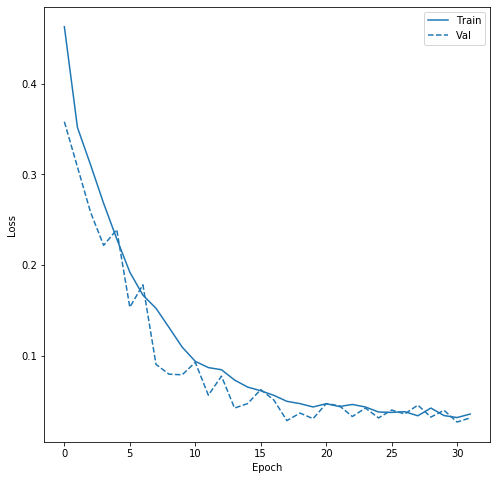

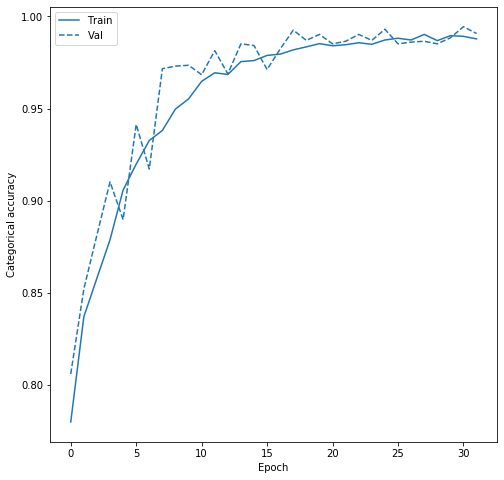

In [24]:
# Plot the training/validation history of our Keras model
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_metrics(history)

### Evaluate Metrics
You can use a confusion matrix to summarize the actual vs. predicted labels where the X axis is the predicted label and the Y axis is the actual label.

In [25]:
import sklearn
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(8,8))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion Matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

Evaluate your model on the test dataset and display the evaluation metrics and the confusion matrix.

3428/3428 [==============================] - 1s 271us/sample - loss: 0.2027 - categorical_accuracy: 0.9478
loss :  0.2027174266670677
categorical_accuracy :  0.947783



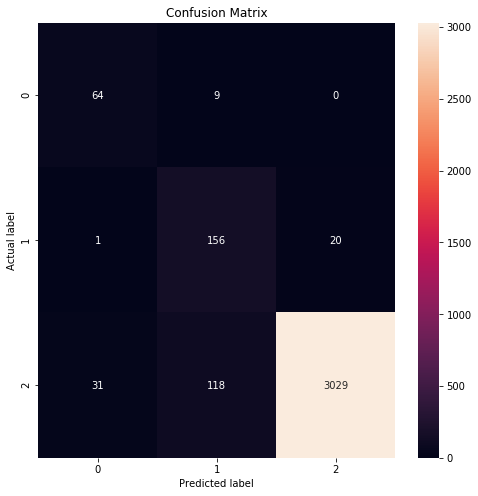

In [26]:
y_test_predictions = model.predict_classes(X_test, batch_size=4)
baseline_results = model.evaluate(X_test, y_test_one_hot,
                                  batch_size=4, verbose=1)

for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(Y_test, y_test_predictions+1)